## Credit fraud dectection using ML algorithms

## - Data preprocessing -

In [2]:
# Importing the dataset
dataset2 = read.csv('D://R/creditcard.csv')
dataset2 = dataset2[2:31]
head(dataset2)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [4]:
# Reduce dimenstion using PLS
#install.packages('pls')
library(pls)
pls_std = plsr(Class ~., data=dataset2, ncomp =2)
k = predict(pls_std, newdata = dataset2)
vec1 = k[,1,1]
vec2 = k[,1,2]
vec3 = dataset2[,30]
dataset=data.frame(v1 = vec1, v2 = vec2, Class= vec3)
head(dataset)

v1,v2,Class
0.001802549,-0.0017635885,0
0.001622308,-0.0007884368,0
0.002083457,-0.0051089810,0
0.001770326,-0.0073079124,0
0.001704831,-0.0023091477,0
0.001623557,0.0007012727,0


In [5]:
# Splitting the dataset into the Training set and Test set
# Encoding the target feature as factor
dataset$Class = factor(dataset$Class, levels = c(0, 1))
# install.packages('random')
# install.packages('caTools')
library(caTools)
library(random)
set.seed(121)
split = sample.split(dataset$Class, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)
head(training_set)

,v1,v2,Class
1,0.001802549,-0.0017635885,0
3,0.002083457,-0.0051089810,0
5,0.001704831,-0.0023091477,0
6,0.001623557,0.0007012727,0
7,0.001625067,-0.0027946617,0
8,0.001668901,-0.0059315717,0


In [6]:
# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

## 1. Random Forest

In [8]:
library(randomForest)
# start the clock
start_time <- Sys.time()
classifier = randomForest(x = training_set[-3],
                          y = training_set$Class,
                          ntree = 300)

# Stop the clock and save the running time
end_time <- Sys.time()
time_RF = end_time - start_time

In [9]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

# Building the Confusion Matrix
confusion = as.data.frame(table(test_set[, 3], y_pred))
names(confusion) = c("Actual","Predicted","Freq")
confusion$Percent=confusion$Freq/sum(confusion$Freq) * 100
confusion

Actual,Predicted,Freq,Percent
0,0,71059,99.79916294
1,0,33,0.04634701
0,1,20,0.02808910
1,1,90,0.12640094


The running time of Random Forest algorithm is 52.19282 
The accuracy of Random Forest algorithm is 99.79916

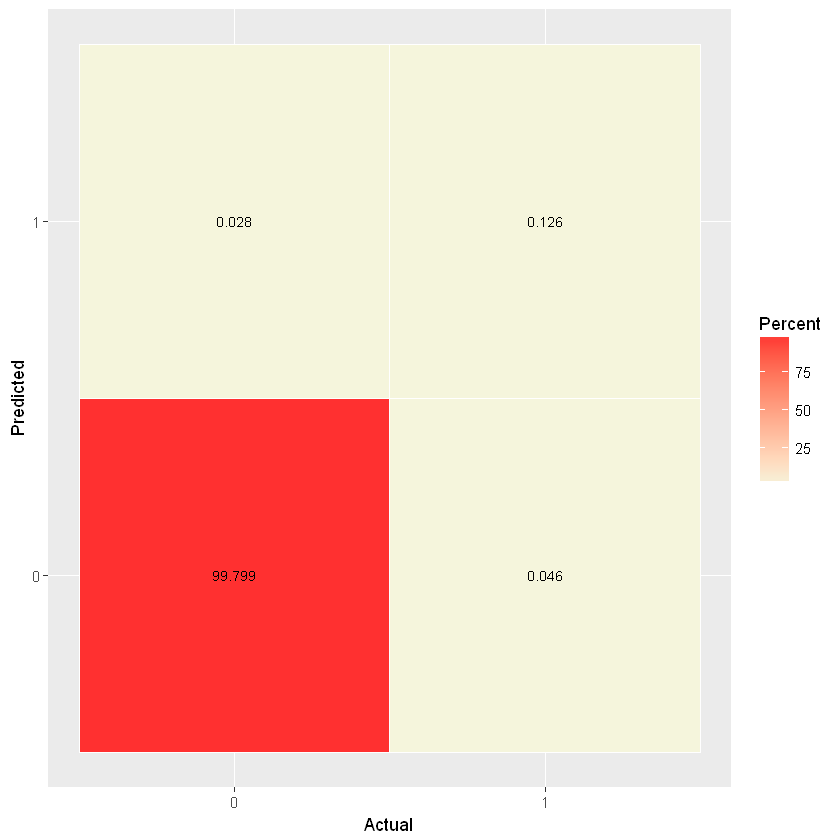

In [11]:
# Visualising the Test set results
library(ggplot2)
tile <- ggplot() +
  geom_tile(aes(x=Actual, y=Predicted,fill=Percent),data=confusion, color="White",size=0.1) +
  labs(x="Actual",y="Predicted")
tile = tile + 
  geom_text(aes(x=Actual,y=Predicted, label=sprintf("%.3f", Percent)),data=confusion, size=3, colour="black") +
  scale_fill_gradient(low="beige",high="firebrick1")

tile
cm_RF = confusion[1,4] + confusion[4,4]
cat("The running time of Random Forest algorithm is",time_RF,"\n")
cat("The accuracy of Random Forest algorithm is",cm_RF)

## 2. k-nearest neighbors(KNN)

In [12]:
library(class)
# start the clock
start_time <- Sys.time()

y_pred = knn(train = training_set[, -3],
             test = test_set[, -3],
             cl = training_set[, 3],
             k = 5,
             prob = TRUE)
# Stop the clock and save the running time
end_time <- Sys.time()
time = end_time - start_time

In [13]:
# Building the Confusion Matrix
confusion = as.data.frame(table(test_set[, 3], y_pred))
names(confusion) = c("Actual","Predicted","Freq")
confusion$Percent=confusion$Freq/sum(confusion$Freq) * 100
confusion

Actual,Predicted,Freq,Percent
0,0,71073,99.81882531
1,0,39,0.05477374
0,1,6,0.00842673
1,1,84,0.11797421


The running time of k-nearest neighbors is 55.5181 
The accuracy of k-nearest neighbors is 99.81883

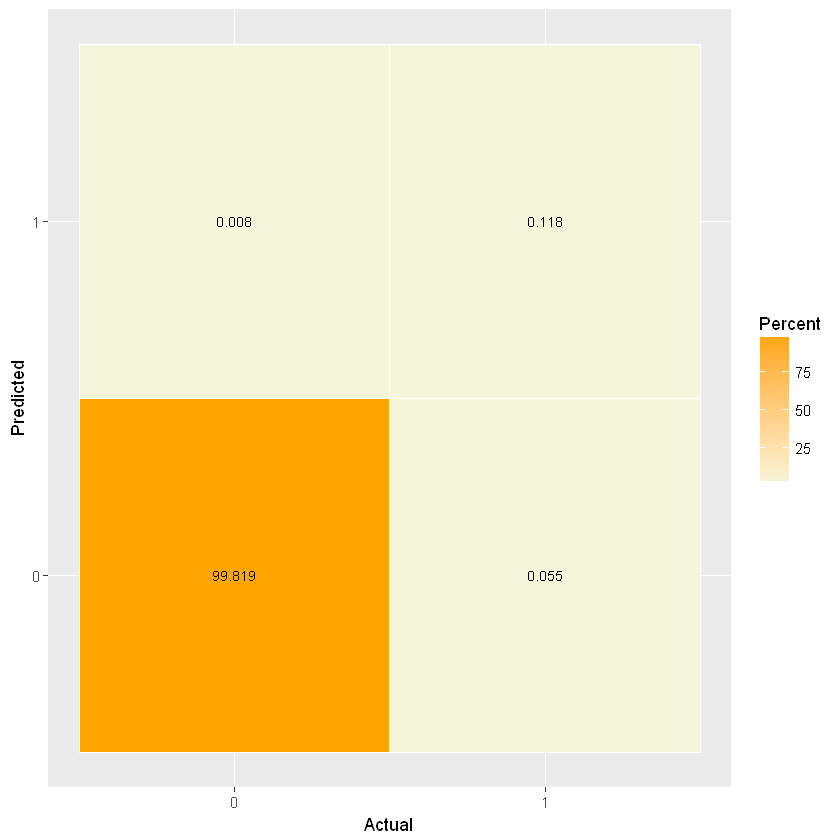

In [14]:
# Visualising the Test set results
# library(ggplot2)
tile <- ggplot() +
  geom_tile(aes(x=Actual, y=Predicted,fill=Percent),data=confusion, color="White",size=0.1) +
  labs(x="Actual",y="Predicted")
tile = tile + 
  geom_text(aes(x=Actual,y=Predicted, label=sprintf("%.3f", Percent)),data=confusion, size=3, colour="black") +
  scale_fill_gradient(low="beige",high="orange")

tile
time_KNN = time
cm_KNN = confusion[1,4] + confusion[4,4]
cat("The running time of k-nearest neighbors is",time_KNN,"\n")
cat("The accuracy of k-nearest neighbors is",cm_KNN)

## 3. Naïve Bayes

In [15]:
# Fitting Naive Bayes to the Training set
# install.packages('e1071')
library(e1071)
# start the clock
start_time <- Sys.time()

classifier = naiveBayes(x = training_set[-3],
                        y = training_set$Class)
# Stop the clock and save the running time
end_time <- Sys.time()
time = end_time - start_time

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
head(y_pred)

[1] 0 0 0 0 0 0
Levels: 0 1

In [16]:
# Building the Confusion Matrix
confusion = as.data.frame(table(test_set[, 3], y_pred))
names(confusion) = c("Actual","Predicted","Freq")
confusion$Percent=confusion$Freq/sum(confusion$Freq) * 100
confusion

Actual,Predicted,Freq,Percent
0,0,70750,99.3651864
1,0,51,0.0716272
0,1,329,0.4620657
1,1,72,0.1011208


The running time of Naïve Bayes algorithm is 0.06734204 
The accuracy of Naïve Bayes algorithm is 99.36519

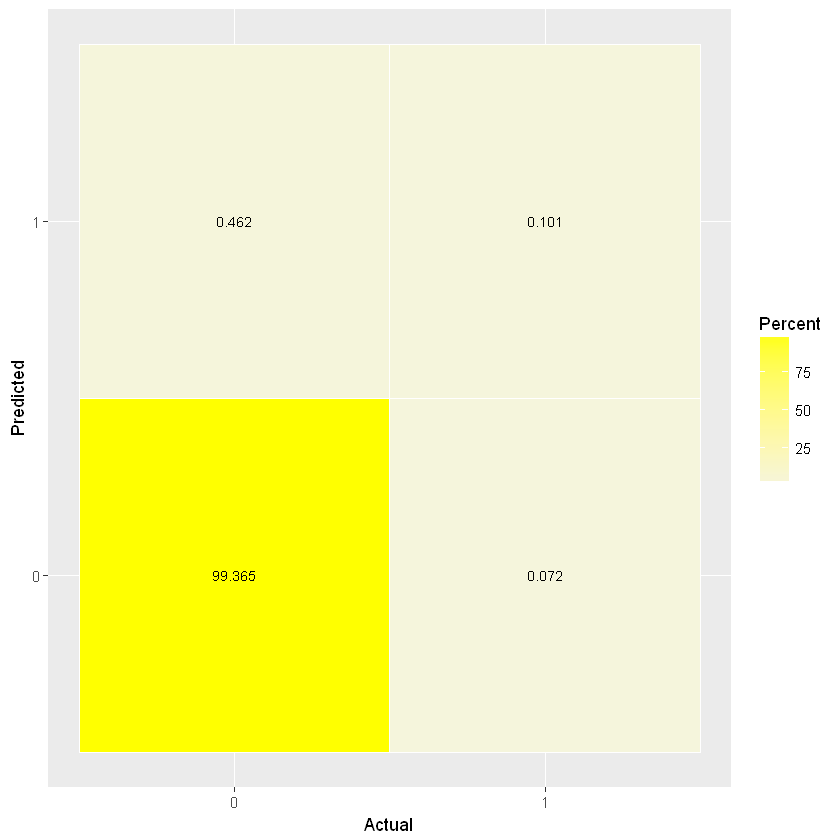

In [17]:
# Visualising the Test set results
# library(ggplot2)
tile <- ggplot() +
  geom_tile(aes(x=Actual, y=Predicted,fill=Percent),data=confusion, color="White",size=0.1) +
  labs(x="Actual",y="Predicted")
tile = tile + 
  geom_text(aes(x=Actual,y=Predicted, label=sprintf("%.3f", Percent)),data=confusion, size=3, colour="black") +
  scale_fill_gradient(low="beige",high="yellow")

tile
time_NB = time
cm_NB = confusion[1,4] + confusion[4,4]
cat("The running time of Naïve Bayes algorithm is",time_NB,"\n")
cat("The accuracy of Naïve Bayes algorithm is",cm_NB)

## 4. XGBoost(Extreme Gradient Boost)

In [18]:
# XGBoost use integer class so we make training set and test set again.
vec1 = k[,1,1]
vec2 = k[,1,2]
vec3 = dataset2[,30]
dataset=data.frame(v1 = vec1, v2 = vec2, Class= vec3)
head(dataset)

# Splitting the dataset into the Training set and Test set
#library(caTools)
#library(random)
set.seed(121)
split = sample.split(dataset$Class, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)
head(training_set)

v1,v2,Class
0.001802549,-0.0017635885,0
0.001622308,-0.0007884368,0
0.002083457,-0.0051089810,0
0.001770326,-0.0073079124,0
0.001704831,-0.0023091477,0
0.001623557,0.0007012727,0


,v1,v2,Class
1,0.001802549,-0.0017635885,0
3,0.002083457,-0.0051089810,0
5,0.001704831,-0.0023091477,0
6,0.001623557,0.0007012727,0
7,0.001625067,-0.0027946617,0
8,0.001668901,-0.0059315717,0


In [19]:
# Fitting XGBoost to the Training set
# install.packages('xgboost')
library(xgboost)
# start the clock
start_time <- Sys.time()

classifier = xgboost(data = as.matrix(training_set[-3]), label = as.integer(training_set$Class), nrounds = 10)
# Stop the clock and save the running time
end_time <- Sys.time()
time = end_time - start_time

# Predicting the Test set results
y_pred = predict(classifier, newdata = as.matrix(test_set[-3]))
y_pred = (y_pred >= 0.5)
head(y_pred)
head(test_set[,3])

[1]	train-rmse:0.350361 
[2]	train-rmse:0.245742 
[3]	train-rmse:0.172686 
[4]	train-rmse:0.121808 
[5]	train-rmse:0.086492 
[6]	train-rmse:0.062238 
[7]	train-rmse:0.045845 
[8]	train-rmse:0.035025 
[9]	train-rmse:0.028232 
[10]	train-rmse:0.024214 


[1] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 0 0 0 0 0 0

In [20]:
# Building the Confusion Matrix
confusion = as.data.frame(table(test_set[, 3], y_pred))
names(confusion) = c("Actual","Predicted","Freq")
confusion$Percent=confusion$Freq/sum(confusion$Freq) * 100
confusion

Actual,Predicted,Freq,Percent
0,FALSE,71074,99.820229769
1,FALSE,35,0.049155923
0,TRUE,5,0.007022275
1,TRUE,88,0.123592034


In [22]:
# Applying k-Fold Cross Validation
# install.packages('caret')
library(caret)
folds = createFolds(training_set$Class, k = 10)
cv = lapply(folds, function(x) {
  training_fold = training_set[-x, ]
  test_fold = training_set[x, ]
  classifier = xgboost(data = as.matrix(training_set[-3]), label = training_set$Class, nrounds = 10)
  y_pred = predict(classifier, newdata = as.matrix(test_fold[-3]))
  y_pred = (y_pred >= 0.5)
  cm = table(test_fold[, 3], y_pred)
  accuracy = (cm[1,1]+cm[2,2]) /margin.table(cm)
  return(accuracy)
})
cm_XGB_KCV = mean(as.numeric(cv))

[1]	train-rmse:0.350361 
[2]	train-rmse:0.245742 
[3]	train-rmse:0.172686 
[4]	train-rmse:0.121808 
[5]	train-rmse:0.086492 
[6]	train-rmse:0.062238 
[7]	train-rmse:0.045845 
[8]	train-rmse:0.035025 
[9]	train-rmse:0.028232 
[10]	train-rmse:0.024214 
[1]	train-rmse:0.350361 
[2]	train-rmse:0.245742 
[3]	train-rmse:0.172686 
[4]	train-rmse:0.121808 
[5]	train-rmse:0.086492 
[6]	train-rmse:0.062238 
[7]	train-rmse:0.045845 
[8]	train-rmse:0.035025 
[9]	train-rmse:0.028232 
[10]	train-rmse:0.024214 
[1]	train-rmse:0.350361 
[2]	train-rmse:0.245742 
[3]	train-rmse:0.172686 
[4]	train-rmse:0.121808 
[5]	train-rmse:0.086492 
[6]	train-rmse:0.062238 
[7]	train-rmse:0.045845 
[8]	train-rmse:0.035025 
[9]	train-rmse:0.028232 
[10]	train-rmse:0.024214 
[1]	train-rmse:0.350361 
[2]	train-rmse:0.245742 
[3]	train-rmse:0.172686 
[4]	train-rmse:0.121808 
[5]	train-rmse:0.086492 
[6]	train-rmse:0.062238 
[7]	train-rmse:0.045845 
[8]	train-rmse:0.035025 
[9]	train-rmse:0.028232 
[10]	train-rmse:0.0242

The running time of Naïve Bayes algorithm is 0.743468 
The accuracy of Naïve Bayes algorithm is 99.82023 
The accuracy of Naïve Bayes algorithm after K-Fold Cross Validation is 99.95974

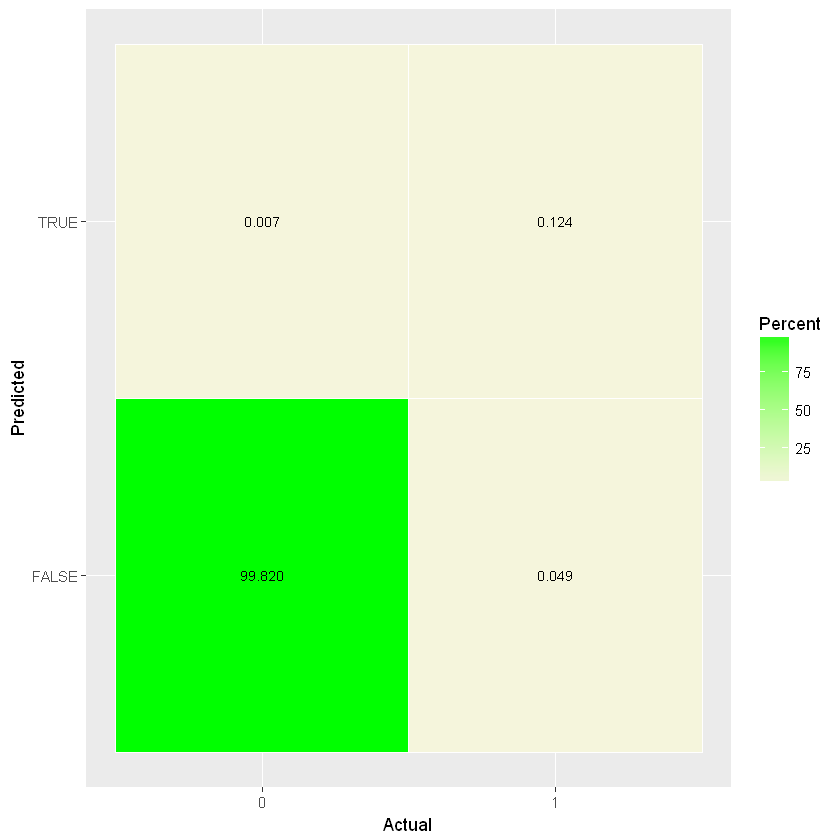

In [24]:
# Visualising the Test set results
# library(ggplot2)
tile <- ggplot() +
  geom_tile(aes(x=Actual, y=Predicted,fill=Percent),data=confusion, color="White",size=0.1) +
  labs(x="Actual",y="Predicted")
tile = tile + 
  geom_text(aes(x=Actual,y=Predicted, label=sprintf("%.3f", Percent)),data=confusion, size=3, colour="black") +
  scale_fill_gradient(low="beige",high="green")

tile
time_XGB = time
cm_XGB = confusion[1,4] + confusion[4,4]
cm_XGB_KCV = cm_XGB_KCV*100
cat("The running time of Naïve Bayes algorithm is",time_XGB,"\n")
cat("The accuracy of Naïve Bayes algorithm is",cm_XGB,"\n")
cat("The accuracy of Naïve Bayes algorithm after K-Fold Cross Validation is",cm_XGB_KCV)

## 5 Support Vector Machine(SVM)

In [25]:
# Fitting Kernel SVM to the Training set
# install.packages('e1071')
library(e1071)
# Start the clock
start_time <- Sys.time()
classifier = svm(formula = Class ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')
# Stop the clock and save the running time
end_time <- Sys.time()
time = end_time - start_time

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-30])


In [26]:
# Building the Confusion Matrix
confusion = as.data.frame(table(test_set[, 3], y_pred))
names(confusion) = c("Actual","Predicted","Freq")
confusion$Percent=confusion$Freq/sum(confusion$Freq) * 100
confusion

Actual,Predicted,Freq,Percent
0,0,71070,99.81461195
1,0,30,0.04213365
0,1,9,0.01264009
1,1,93,0.13061431


In [27]:
# Applying k-Fold Cross Validation
# install.packages('caret')
# library(caret)
folds = createFolds(training_set$Class, k = 10)
cv = lapply(folds, function(x) {
  training_fold = training_set[-x, ]
  test_fold = training_set[x, ]
  classifier = classifier
  y_pred = predict(classifier, newdata = test_fold[-3])
  cm = table(test_fold[, 3], y_pred)
  accuracy = (cm[1,1] + cm[2,2])/margin.table(cm)
  return(accuracy)
})
cm_SVM_KCV = mean(as.numeric(cv))

The running time of Naïve Bayes algorithm is 2.700743 
The accuracy of Naïve Bayes algorithm is 99.81461 
The accuracy of Naïve Bayes algorithm after K-Fold Cross Validation is 99.93727

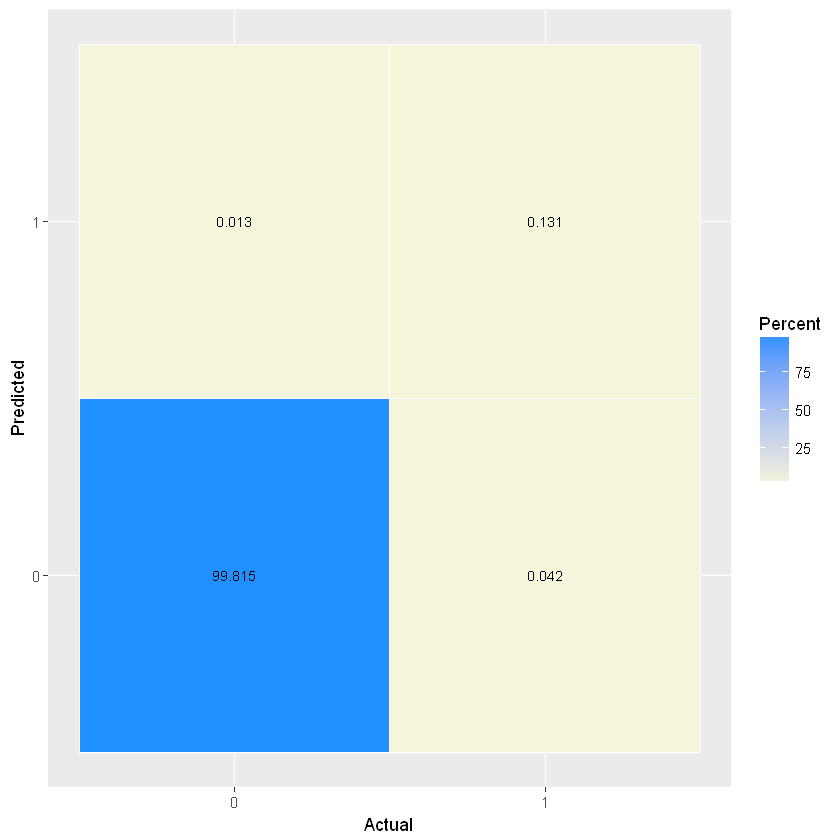

In [28]:
# Visualising the Test set results
# library(ggplot2)
tile <- ggplot() +
  geom_tile(aes(x=Actual, y=Predicted,fill=Percent),data=confusion, color="White",size=0.1) +
  labs(x="Actual",y="Predicted")
tile = tile + 
  geom_text(aes(x=Actual,y=Predicted, label=sprintf("%.3f", Percent)),data=confusion, size=3, colour="black") +
  scale_fill_gradient(low="beige",high="dodgerblue")

tile
time_SVM = time
cm_SVM = confusion[1,4] + confusion[4,4]
cm_SVM_KCV = cm_SVM_KCV*100
cat("The running time of Naïve Bayes algorithm is",time_SVM,"\n")
cat("The accuracy of Naïve Bayes algorithm is",cm_SVM,"\n")
cat("The accuracy of Naïve Bayes algorithm after K-Fold Cross Validation is",cm_SVM_KCV)

## 6 Performance test

RF,KNN,NB,XGB,XGB_KCV,SVM,SVM_KCV
0.2008371,0.1811747,0.6348136,0.1797702,0.04026123,0.1853881,0.06273268


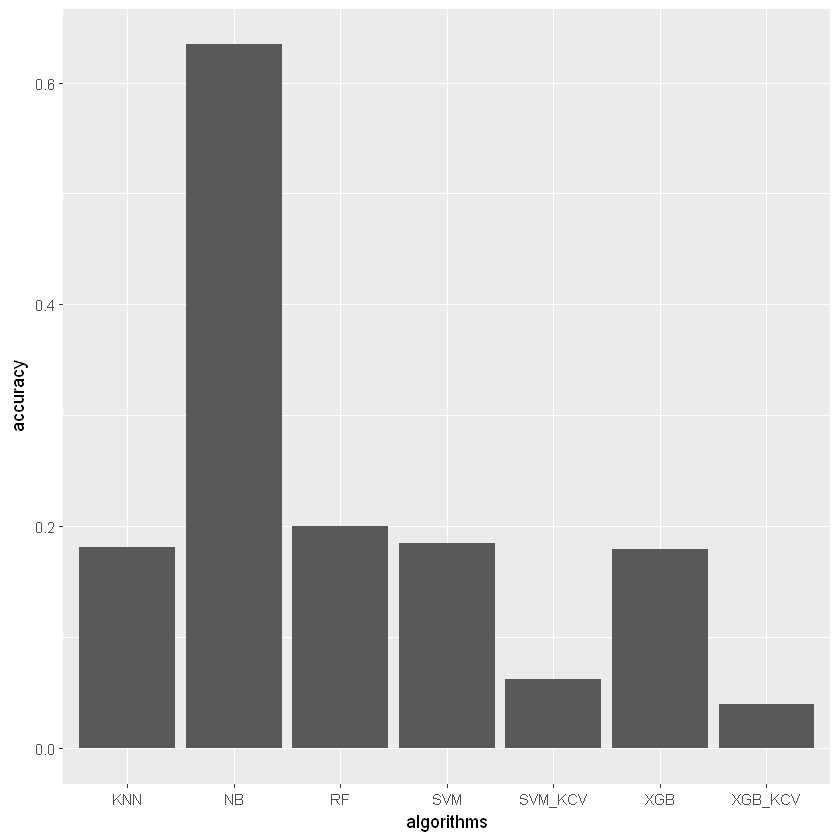

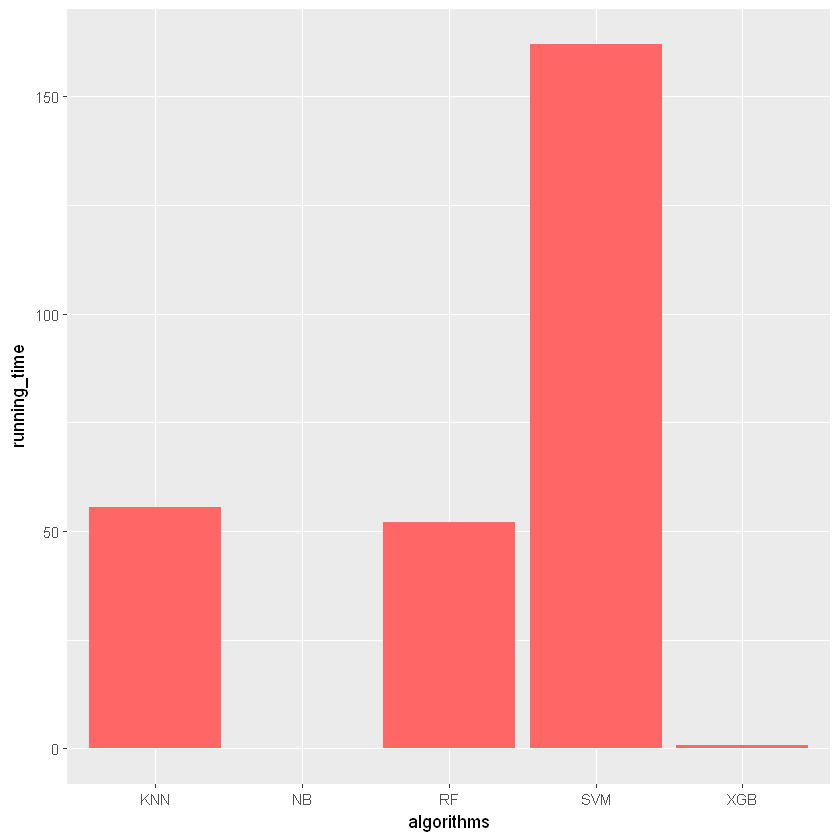

In [64]:
# When a accuracy value is close to 0, a algorithm is more accurate
accuracy = 100 - c(cm_RF,cm_KNN,cm_NB,cm_XGB,cm_XGB_KCV,cm_SVM,cm_SVM_KCV)
accuracy_t = matrix(accuracy, nrow=1, ncol=7)
colnames(accuracy_t) = c("RF","KNN","NB","XGB","XGB_KCV","SVM","SVM_KCV")
accuracy_t
running_time = as.double(c(time_RF,time_KNN,time_NB,time_XGB,time_SVM))

ac = data.frame(algorithms = c("RF","KNN","NB","XGB","XGB_KCV","SVM","SVM_KCV"), accuracy)

p <-ggplot(ac, aes(algorithms, accuracy))
p +geom_bar(stat = "identity")

pf = data.frame(algorithms = c("RF","KNN","NB","XGB","SVM"),running_time)

p2 <- ggplot(data = pf, aes(x = algorithms, y = running_time) )
p2 + geom_bar(stat = "identity", fill = "#FF6666")



## Summary

When we adjust k-Fold Cross Validation, It shows better performance

KNN, SVM, and SGB show similar accuracy but when we consider running time, it is better not to use SVM. 

XGB shows the best accuracy and the second shortest running time. So, in this data, XGB performs better in both ways!